# Progetto di IUM
### Mangini Dario, 2024-2025

### Importazione delle librerie e creazione dei dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_movies = pd.read_csv('data/main_data/movies.csv')
df_actors = pd.read_csv('data/main_data/actors.csv')
df_countries = pd.read_csv('data/main_data/countries.csv')
df_crew = pd.read_csv('data/main_data/crew.csv')
df_genres = pd.read_csv('data/main_data/genres.csv')
df_languages = pd.read_csv('data/main_data/languages.csv')
df_posters = pd.read_csv('data/main_data/posters.csv')
df_releases = pd.read_csv('data/main_data/releases.csv')
df_studios = pd.read_csv('data/main_data/studios.csv')
df_themes = pd.read_csv('data/main_data/themes.csv')

df_rotten = pd.read_csv('data/additional_data/rotten_tomatoes_reviews.csv')
df_oscar = pd.read_csv('data/additional_data/the_oscar_awards.csv')

# Primo controllo e pulizia dei dati per ogni dataset

## 1. Movies.csv

### Prima visualizzazione dei dati di movies

In [2]:
df_movies

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
...,...,...,...,...,...,...,...
941592,1941593,神笛,NaN,NaN,NaN,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,NaN,"The city that never sleeps, where insects gath...",30.0,NaN
941595,1941596,重生,NaN,NaN,"In a world where order has broken down, darkne...",NaN,NaN


In [3]:
df_movies.shape

(941597, 7)

In [4]:
df_movies.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

Faccio una copia del dataframe, che altrimenti potrebbe casuare problemi con altre operazioni in seguito

In [5]:
df_movies_clean = df_movies.copy()

### Visualizzazione e gestione dei dati nulli per movies

In [6]:
# Conta i valori mancanti per colonna
print(df_movies_clean.isnull().sum())

id                  0
name               10
date            91913
tagline        802210
description    160812
minute         181570
rating         850598
dtype: int64


In [7]:
# Filtra le righe con valori mancanti
df_movies_clean[df_movies_clean.isna().any(axis=1)]

,id,name,date,tagline,description,minute,rating
34,1000035,Black Swan,2010.0,NaN,A journey through the psyche of a young baller...,108.0,4.15
68,1000069,Past Lives,2023.0,NaN,"Nora and Hae Sung, two childhood friends, are ...",106.0,4.18
133,1000134,Toy Story,1995.0,NaN,"Led by Woody, Andy's toys live happily in his ...",81.0,4.12
146,1000147,Requiem for a Dream,2000.0,NaN,The hopes and dreams of four ambitious people ...,102.0,4.10
162,1000163,Asteroid City,2023.0,NaN,Set in a fictional American desert town circa ...,105.0,3.52
...,...,...,...,...,...,...,...
941592,1941593,神笛,NaN,NaN,NaN,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,NaN,"The city that never sleeps, where insects gath...",30.0,NaN
941595,1941596,重生,NaN,NaN,"In a world where order has broken down, darkne...",NaN,NaN


In [8]:
# Seleziona le righe dove 'name' è NaN
righe_con_na = df_movies_clean[df_movies_clean['name'].isna()]
righe_con_na

,id,name,date,tagline,description,minute,rating
287514,1287515,NaN,2015.0,NaN,NONE is a short film that explores the balance...,4.0,NaN
617642,1617643,NaN,NaN,NaN,NaN,NaN,NaN
646520,1646521,NaN,2008.0,NaN,NaN,NaN,NaN
648185,1648186,NaN,NaN,NaN,NaN,NaN,NaN
720294,1720295,NaN,NaN,NaN,"In this directorial debut of Eden Ewardson, he...",8.0,NaN
725369,1725370,NaN,NaN,NaN,NaN,NaN,NaN
741481,1741482,NaN,NaN,NaN,NaN,90.0,NaN
840337,1840338,NaN,NaN,NaN,NaN,NaN,NaN
883228,1883229,NaN,NaN,NaN,NaN,NaN,NaN
894771,1894772,NaN,NaN,NaN,NaN,NaN,NaN


Rimuovo le righe dove name è null perché non mi utile tenere film di cui non so neanche il nome

In [9]:
# Rimuove righe con valori nulli nella colonna 'name'
df_movies_clean = df_movies_clean.dropna(subset=['name'])

In [10]:
# Seleziona le righe dove 'date' è NaN
righe_con_na = df_movies_clean[df_movies_clean['date'].isna()]
righe_con_na

,id,name,date,tagline,description,minute,rating
3529,1003530,Spider-Man: Beyond the Spider-Verse,NaN,NaN,Taking place right after the events of Spider-...,NaN,NaN
5493,1005494,Wake Up Dead Man: A Knives Out Mystery,NaN,NaN,Benoit Blanc returns in his most dangerous cas...,NaN,NaN
7119,1007120,My Year of Rest and Relaxation,NaN,NaN,"Bored with her seemingly meaningless life, a y...",NaN,NaN
7914,1007915,Frankenstein,NaN,NaN,"Dr. Victor Frankenstein, a brilliant but egoti...",NaN,NaN
8110,1008111,Mad Max: The Wasteland,NaN,NaN,Mad Max: The Wasteland is an upcoming film in ...,NaN,NaN
...,...,...,...,...,...,...,...
941592,1941593,神笛,NaN,NaN,NaN,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,NaN,"The city that never sleeps, where insects gath...",30.0,NaN
941595,1941596,重生,NaN,NaN,"In a world where order has broken down, darkne...",NaN,NaN


Di sopra possiamo dedurre che i film che non hanno una data sono film che devono ancora uscire, per cui possiamo sostituire un valore simbolico come zero per ricordarci di questo fatto in seguito.

In [11]:
# Sostituisce i valori NaN nella colonna 'date' con 0
df_movies_clean['date'] = df_movies_clean['date'].fillna(0)

Per le righe dove tagline e description sono nulli non ho interesse a modificare il valore perché dubito che possano essere utilizzati durante l'analisi successivamente.

In [12]:
# Seleziona le righe dove 'minute' è NaN
righe_con_na = df_movies_clean[df_movies_clean['minute'].isna()]
righe_con_na

,id,name,date,tagline,description,minute,rating
2572,1002573,Nosferatu,2024.0,NaN,A gothic tale of obsession between a haunted y...,NaN,NaN
3529,1003530,Spider-Man: Beyond the Spider-Verse,0.0,NaN,Taking place right after the events of Spider-...,NaN,NaN
4679,1004680,The Batman - Part II,2026.0,NaN,Sequel to the 2022 film The Batman.,NaN,NaN
5493,1005494,Wake Up Dead Man: A Knives Out Mystery,0.0,NaN,Benoit Blanc returns in his most dangerous cas...,NaN,NaN
5554,1005555,Wicked,2024.0,Everyone deserves a chance to fly.,"Elphaba, an ostracized but defiant girl born w...",NaN,NaN
...,...,...,...,...,...,...,...
941589,1941590,機動戦士ガンダムUC: ユニコーンの日,0.0,NaN,NaN,NaN,NaN
941590,1941591,火线干探之革命,0.0,NaN,NaN,NaN,NaN
941591,1941592,画江湖之不良人,0.0,NaN,NaN,NaN,NaN
941592,1941593,神笛,0.0,NaN,NaN,NaN,NaN


Nelle righe dove minute (la durata) ha valore nullo sostituisco come valore simbolico -1.

In [13]:
# Sostituisce i valori NaN nella colonna 'minute' con -1
df_movies_clean['minute'] = df_movies_clean['minute'].fillna(-1)

In [14]:
# Seleziona le righe dove 'rating' è NaN
righe_con_na = df_movies_clean[df_movies_clean['rating'].isna()]
righe_con_na

,id,name,date,tagline,description,minute,rating
2532,1002533,MaXXXine,2024.0,Hollywood is a killer.,"In 1980s Hollywood, adult film star and aspiri...",104.0,NaN
2572,1002573,Nosferatu,2024.0,NaN,A gothic tale of obsession between a haunted y...,-1.0,NaN
3257,1003258,Deadpool & Wolverine,2024.0,Come together.,A listless Wade Wilson toils away in civilian ...,127.0,NaN
3348,1003349,Joker: Folie à Deux,2024.0,The world is a stage.,A sequel to the 2019 film Joker.,120.0,NaN
3529,1003530,Spider-Man: Beyond the Spider-Verse,0.0,NaN,Taking place right after the events of Spider-...,-1.0,NaN
...,...,...,...,...,...,...,...
941592,1941593,神笛,0.0,NaN,NaN,-1.0,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,0.0,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,0.0,NaN,"The city that never sleeps, where insects gath...",30.0,NaN
941595,1941596,重生,0.0,NaN,"In a world where order has broken down, darkne...",-1.0,NaN


Nelle righe dove rating (la valutazione) è nulla sostituisco come valore simbolico -1


In [15]:
# Sostituisce i valori NaN nella colonna 'rating' con -1
df_movies_clean['rating'] = df_movies_clean['rating'].fillna(-1)

### Controllo e gestione dei valori duplicati per movies


In [16]:
# Trova i duplicati completi
duplicates = df_movies_clean[df_movies_clean.duplicated()]

duplicates

,id,name,date,tagline,description,minute,rating


In [17]:
# Trova i duplicati in base al nome
duplicates = df_movies_clean[df_movies_clean.duplicated(subset=['name'])]

duplicates

,id,name,date,tagline,description,minute,rating
389,1000390,Scream,2022.0,It's always someone you know.,Twenty-five years after a streak of brutal mur...,114.0,3.21
453,1000454,Suspiria,2018.0,Give your soul to the dance.,A darkness swirls at the center of a world-ren...,152.0,3.74
473,1000474,Mean Girls,2024.0,Plastic is forever.,New student Cady Heron is welcomed into the to...,113.0,2.69
668,1000669,The Little Mermaid,1989.0,Somewhere under the sea and beyond your imagin...,This colorful adventure tells the story of an ...,83.0,3.67
704,1000705,Beauty and the Beast,2017.0,Be our guest.,A live-action adaptation of Disney's version o...,129.0,3.07
...,...,...,...,...,...,...,...
941512,1941513,Untouchable,0.0,NaN,Zun Fei (Shen Teng) with a group of brothers t...,-1.0,-1.00
941514,1941515,Vagabond,0.0,NaN,"... shot at the ""Love-In"" held in Elysian Park...",6.0,-1.00
941524,1941525,Waste,0.0,NaN,When Orel learns that God hates waste he decid...,11.0,-1.00
941532,1941533,Without,0.0,NaN,NaN,6.0,-1.00


In [18]:
# Filtra le righe dove il valore della colonna 'name' è uguale a 'Scream'
scream_rows = df_movies_clean.loc[df_movies_clean['name'] == 'Scream']

# Visualizza le righe trovate
print("Righe con il nome 'Scream':")
scream_rows

Righe con il nome 'Scream':


,id,name,date,tagline,description,minute,rating
122,1000123,Scream,1996.0,Someone has taken their love of scary movies o...,A killer known as Ghostface begins killing off...,112.0,4.02
389,1000390,Scream,2022.0,It's always someone you know.,Twenty-five years after a streak of brutal mur...,114.0,3.21
28275,1028276,Scream,1981.0,It was the perfect weekend vacation until THE ...,A group of people on a rafting excursion happe...,82.0,2.18
143379,1143380,Scream,1978.0,NaN,"Film consists of shots of Belgrade Zoo, animal...",9.0,-1.00
149643,1149644,Scream,1949.0,NaN,"Scream, called the first Turkish horror/thrill...",85.0,-1.00
251118,1251119,Scream,2007.0,NaN,A group of new students register to be members...,92.0,-1.00
359087,1359088,Scream,2023.0,NaN,"Mels, who was born without legs, lives in a sm...",108.0,-1.00
414221,1414222,Scream,1964.0,NaN,NaN,98.0,-1.00
431991,1431992,Scream,2021.0,NaN,"An experimental essay film about terrorism, me...",47.0,-1.00
504961,1504962,Scream,2018.0,NaN,Mongolian horror anthology,80.0,-1.00


Dall'esempio di sopra possiamo capire che solo il nome non basta per capire se un duplicato si può eliminare, dato che ci possono essere film con lo stesso nome ma fatti in anni diversi.

In [19]:
# Trova tutte le occorrenze duplicate nella colonna "name" e "date"
duplicati_name_date = df_movies_clean[df_movies_clean.duplicated(subset=['name', 'date'], keep=False)]

print("Tutte le occorrenze duplicate nella colonna 'name' e 'date':")
duplicati_name_date

Tutte le occorrenze duplicate nella colonna 'name' e 'date':


,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
58,1000059,Taxi Driver,1976.0,"On every street in every city, there's a nobod...",A mentally unstable Vietnam War veteran works ...,114.0,4.17
63,1000064,Arrival,2016.0,Why are they here?,Taking place after alien crafts land around th...,116.0,4.12
68,1000069,Past Lives,2023.0,NaN,"Nora and Hae Sung, two childhood friends, are ...",106.0,4.18
85,1000086,Us,2019.0,Watch yourself,Husband and wife Gabe and Adelaide Wilson take...,116.0,3.65
...,...,...,...,...,...,...,...
941505,1941506,Unravel,0.0,"Alexia, a young woman who struggles with anxie...",Along her journey to relieve herself of anxiet...,7.0,-1.00
941510,1941511,Untitled Project,0.0,NaN,A narrator is simply trying to do his job.,-1.0,-1.00
941514,1941515,Vagabond,0.0,NaN,"... shot at the ""Love-In"" held in Elysian Park...",6.0,-1.00
941524,1941525,Waste,0.0,NaN,When Orel learns that God hates waste he decid...,11.0,-1.00


Elimino i dati dove nome e data sono uguali per l'improbabilità che venga fatto un film con lo stesso nome nello stesso anno.

In [20]:
# Rimuovo i duplicati basandoti su 'name' e 'date', mantenendo la prima occorrenza
df_movies_clean = df_movies_clean.drop_duplicates(subset=['name', 'date'])

### Conversione e ultime operazioni per movies

In [21]:
# Conversione delle colonne in stringhe
df_movies_clean['name'] = df_movies_clean['name'].astype(str)
df_movies_clean['tagline'] = df_movies_clean['tagline'].astype(str)
df_movies_clean['description'] = df_movies_clean['description'].astype(str)
# Rinomina la colonna 'date' in 'year'
df_movies_clean = df_movies_clean.rename(columns={'date': 'year'})
#conversione year in formato intero perché se lo converto in data mi aggiunge giorne e mese
df_movies_clean['year'] = df_movies_clean['year'].astype(int)
#Conversione della colonna in intero
df_movies_clean['minute'] = df_movies_clean['minute'].astype(int)

In [22]:
df_movies_clean.head()

,id,name,year,tagline,description,minute,rating
0,1000001,Barbie,2023,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114,3.86
1,1000002,Parasite,2019,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133,4.56
2,1000003,Everything Everywhere All at Once,2022,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140,4.30
3,1000004,Fight Club,1999,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139,4.27
4,1000005,La La Land,2016,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129,4.09


In [23]:
df_movies_clean.columns

Index(['id', 'name', 'year', 'tagline', 'description', 'minute', 'rating'], dtype='object')

## 2. Actors.csv

### Prima visualizzazione dei dati di Actors

In [24]:
df_actors

,id,name,role
0,1000001,Margot Robbie,Barbie
1,1000001,Ryan Gosling,Ken
2,1000001,America Ferrera,Gloria
3,1000001,Ariana Greenblatt,Sasha
4,1000001,Issa Rae,Barbie
...,...,...,...
5798445,1941596,Marc Ma,Ba Cai/巴莱
5798446,1941596,线雨轩,Tata/塔塔
5798447,1941596,Jiang Yixuan,Zuo Yila（Zoila）/佐伊拉
5798448,1941597,Hiroshi Mikami,NaN


In [25]:
df_actors.dtypes

id       int64
name    object
role    object
dtype: object

Faccio una copia del dataframe, che altrimenti potrebbe casuare problemi con altre operazioni in seguito

In [26]:
df_actors_clean = df_actors.copy()

### Controllo e gestione dei valori nulli per Actors

In [27]:
# Conta i valori mancanti per colonna
print(df_actors_clean.isnull().sum())

id            0
name          4
role    1361559
dtype: int64


In [28]:
# Seleziona le righe dove 'name' è NaN
righe_con_na = df_actors_clean[df_actors_clean['name'].isna()]
righe_con_na

,id,name,role
4145738,1443629,NaN,NaN
4281100,1469981,NaN,Self
4306960,1474958,NaN,Cinematography
5430275,1773264,NaN,NaN


Elimino le righe dove il nome è nullo perché non sono utili e sono poche.

In [29]:
# Rimuove righe con valori nulli nella colonna 'name'
df_actors_clean = df_actors_clean.dropna(subset=['name'])

### Controllo e gestione dei valori duplicati per Actors


In [30]:
# Verifica le righe duplicate considerando tutte le colonne
duplicati = df_actors_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_actors_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 946
Righe duplicate:


,id,name,role
3993,1000062,Rosie Jones,Lady of the Boot of Jemiah
44642,1000797,Karel Heřmánek,Czech Injured Man
47807,1000863,Michael Fennimore,Car Salesman
117813,1002509,Isabel Rodriguez,Dancer
125321,1002704,Harry Sabin,Additional Muppet Performer
...,...,...,...
5788300,1935883,Denis Lovrinović,NaN
5791298,1937512,David Livet,NaN
5791299,1937512,David Livet,NaN
5792884,1939290,Gudni Oddgeirsson,Interviewee


In [31]:
# Elimina i duplicati nel DataFrame
df_actors_clean = df_actors_clean.drop_duplicates()

### Conversione e ultime operazioni per Actors

In [32]:
df_actors_clean['name'] = df_actors_clean['name'].astype(str)
df_actors_clean['role'] = df_actors_clean['role'].astype(str)

In [33]:
df_actors_clean = df_actors_clean.rename(columns={'id': 'film_id'})

In [34]:
df_actors_clean.head()

,film_id,name,role
0,1000001,Margot Robbie,Barbie
1,1000001,Ryan Gosling,Ken
2,1000001,America Ferrera,Gloria
3,1000001,Ariana Greenblatt,Sasha
4,1000001,Issa Rae,Barbie


## 3. Countries.csv

### Prima visualizzazione dei dati di Countries

In [35]:
df_countries

,id,country
0,1000001,UK
1,1000001,USA
2,1000002,South Korea
3,1000003,USA
4,1000004,Germany
...,...,...
693471,1941593,China
693472,1941594,USA
693473,1941595,USA
693474,1941596,China


In [36]:
df_countries.dtypes

id          int64
country    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [37]:
df_countries_clean = df_countries.copy()

### Controllo e gestione dei valori nulli per countries

In [38]:
# Conta i valori mancanti per colonna
print(df_countries_clean.isnull().sum())

id         0
country    0
dtype: int64


### Controllo e gestione dei valori duplicati per countries

In [39]:
    # Verifica le righe duplicate considerando tutte le colonne
duplicati = df_countries_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_countries_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


,id,country


### Conversione e ultime operazioni per contries

In [40]:
df_countries_clean['country'] = df_countries_clean['country'].astype(str)
df_countries_clean = df_countries_clean.rename(columns={'id': 'film_id'})

df_countries_clean.head()

,film_id,country
0,1000001,UK
1,1000001,USA
2,1000002,South Korea
3,1000003,USA
4,1000004,Germany


controllo che ci sia solo la dicitura 'UK' per rappresentare il Regno Unito e la dicitura 'USA' per gli Stati Uniti


In [41]:
# Definisci le varianti
varianti_uk = [
    'UK', 'GB', 'GBR', 'United Kingdom', 'Great Britain',
    'United Kingdom of Great Britain and Northern Ireland',
    'England', 'Scotland', 'Wales', 'Northern Ireland', 'Britain'
]

varianti_usa = [
    'USA', 'US', 'U.S.', 'U.S.A.', 'United States',
    'United States of America', 'America'
]

# Uniforma i valori usando una sostituzione diretta senza regex
df_countries_clean['country'] = df_countries_clean['country'].replace(
    {**dict.fromkeys(varianti_uk, 'UK'), **dict.fromkeys(varianti_usa, 'USA')},
    regex=False
)

# Verifica il risultato
print(df_countries_clean['country'].unique())

['UK' 'USA' 'South Korea' 'Germany' 'Hong Kong' 'Canada' 'Sweden'
 'Ireland' 'Japan' 'China' 'France' 'Brazil' 'Italy' 'Czechia'
 'New Zealand' 'Australia' 'India' 'Spain' 'Austria' 'Greece'
 'Netherlands' 'Poland' 'Taiwan' 'Denmark' 'Norway' 'Mexico' 'Switzerland'
 'Turkey' 'Finland' 'USSR' 'Singapore' 'Chile' 'Belgium'
 'United Arab Emirates' 'Malta' 'Hungary' 'South Africa' 'Bulgaria'
 'Czechoslovakia' 'Argentina' 'Iceland' 'Indonesia' 'Slovenia' 'Iran'
 'Luxembourg' 'Philippines' 'Russian Federation' 'Malaysia' 'Portugal'
 'Serbia' 'Algeria' 'Estonia' 'Romania' 'Colombia' 'Thailand' 'Cyprus'
 'Lebanon' 'Qatar' 'Peru' 'Cambodia' 'Bahamas' 'Israel' 'Puerto Rico'
 'Cuba' 'Senegal' 'Bosnia and Herzegovina' 'Georgia' 'Guadeloupe'
 'Uruguay' 'Pakistan' 'Sri Lanka' 'Latvia' 'Tunisia' 'Dominican Republic'
 'Yugoslavia' 'Bolivarian Republic of Venezuela' 'Montenegro' 'Egypt'
 'Ethiopia' 'Ghana' 'Jordan' 'Namibia' 'Saudi Arabia' 'Angola' 'Mali'
 'Myanmar' 'Morocco' 'Syrian Arab Republic' 'Ug

## 4. Crew

### Prima visualizzazione dei dati di Crew


In [42]:
df_crew

,id,role,name
0,1000001,Director,Greta Gerwig
1,1000001,Producer,Tom Ackerley
2,1000001,Producer,Margot Robbie
3,1000001,Producer,Robbie Brenner
4,1000001,Producer,David Heyman
...,...,...,...
4720178,1941596,Casting,线雨轩
4720179,1941596,Editor,Eric Kwong Chi-Leung
4720180,1941596,Cinematography,Kenny Tse
4720181,1941596,Composer,胡小欧


In [43]:
df_crew.dtypes

id       int64
role    object
name    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [44]:
df_crew_clean = df_crew.copy()

### Controllo e gestione dei nulli per crew

In [45]:
# Conta i valori mancanti per colonna
print(df_crew_clean.isnull().sum())

id      0
role    0
name    1
dtype: int64


In [46]:
# Seleziona le righe dove 'name' è NaN
righe_con_na = df_crew_clean[df_crew_clean['name'].isna()]
righe_con_na

,id,role,name
4562126,1859397,Writer,NaN


In [47]:
# Elimina le righe dove la colonna 'name' è nulla
df_crew_clean = df_crew_clean.dropna(subset=['name'])

### Controllo e gestione dei duplicati per crew

In [48]:
# Verifica le righe duplicate considerando tutte le colonne
duplicati = df_crew_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_crew_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 1282
Righe duplicate:


,id,role,name
1721,1000018,Stunts,Chris Webb
2691,1000031,Stunts,Sarah Irwin
2692,1000031,Stunts,Sarah Irwin
3920,1000043,Set decoration,Chris Arnold
6655,1000074,Casting,Magui Jimenez
...,...,...,...
4716242,1940117,Sound,Greg Francis
4716243,1940117,Sound,Greg Francis
4718342,1940904,Assistant director,Choe Yeong-sik
4719628,1941357,Executive producer,Josh Earl


In [49]:
# Elimina i duplicati nel DataFrame
df_crew_clean = df_crew_clean.drop_duplicates()

### Conversione e ultime operazioni per crew

In [50]:
df_crew_clean['role'] = df_crew_clean['role'].astype(str)
df_crew_clean['name'] = df_crew_clean['name'].astype(str)
df_crew_clean = df_crew_clean.rename(columns={'id': 'film_id'})

df_crew_clean.head()

,film_id,role,name
0,1000001,Director,Greta Gerwig
1,1000001,Producer,Tom Ackerley
2,1000001,Producer,Margot Robbie
3,1000001,Producer,Robbie Brenner
4,1000001,Producer,David Heyman


##  5. Genres.csv

### Prima visualizzazione dei dati di Genres

In [51]:
df_genres

,id,genre
0,1000001,Comedy
1,1000001,Adventure
2,1000002,Comedy
3,1000002,Thriller
4,1000002,Drama
...,...,...
1046844,1941563,Drama
1046845,1941566,Crime
1046846,1941569,Crime
1046847,1941596,Action


In [52]:
df_genres.dtypes

id        int64
genre    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [53]:
df_genres_clean = df_genres.copy()

### Controllo e gestione dei dati nulli per genres

In [54]:
# Conta i valori mancanti per colonna
print(df_genres_clean.isnull().sum())

id       0
genre    0
dtype: int64


### Controllo e gestione dei valori duplicati per genres

In [55]:
# Verifica le righe duplicate
duplicati = df_genres_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_genres_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


,id,genre


### Converione e ultime operazioni per Genres

In [56]:
df_genres_clean['genre'] = df_genres_clean['genre'].astype(str)
df_genres_clean = df_genres_clean.rename(columns={'id': 'film_id'})

df_genres_clean.head()

,film_id,genre
0,1000001,Comedy
1,1000001,Adventure
2,1000002,Comedy
3,1000002,Thriller
4,1000002,Drama


## 6. Languages.csv

### Prima visualizzazione dei dati di Languages

In [57]:
df_languages

,id,type,language
0,1000001,Language,English
1,1000002,Primary language,Korean
2,1000002,Spoken language,English
3,1000002,Spoken language,German
4,1000002,Spoken language,Korean
...,...,...,...
1038757,1941593,Language,Chinese
1038758,1941594,Language,English
1038759,1941595,Language,English
1038760,1941596,Language,Chinese


In [58]:
df_languages.dtypes

id           int64
type        object
language    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [59]:
df_languages_clean = df_languages.copy()

### Controllo e gestione dei valori nulli per Languges

In [60]:
# Conta i valori mancanti per colonna
print(df_languages_clean.isnull().sum())

id          0
type        0
language    0
dtype: int64


### Controllo e gestione dei valori duplicati per Languages

In [61]:
# Verifica le righe duplicate
duplicati = df_languages_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_languages_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


,id,type,language


### Conversione e ultime operazioni per langugages

In [62]:
df_languages_clean['type'] = df_languages_clean['type'].astype(str)
df_languages_clean = df_languages_clean.rename(columns={'id': 'film_id'})

df_languages_clean.head()

,film_id,type,language
0,1000001,Language,English
1,1000002,Primary language,Korean
2,1000002,Spoken language,English
3,1000002,Spoken language,German
4,1000002,Spoken language,Korean


## 7. Posters.csv

### Prima visualizzazione dei dati di Posters

In [63]:
df_posters

,id,link
0,1000001,https://a.ltrbxd.com/resized/film-poster/2/7/7...
1,1000002,https://a.ltrbxd.com/resized/film-poster/4/2/6...
2,1000003,https://a.ltrbxd.com/resized/film-poster/4/7/4...
3,1000004,https://a.ltrbxd.com/resized/film-poster/5/1/5...
4,1000005,https://a.ltrbxd.com/resized/film-poster/2/4/0...
...,...,...
941592,1941593,NaN
941593,1941594,NaN
941594,1941595,https://a.ltrbxd.com/resized/film-poster/1/1/8...
941595,1941596,https://a.ltrbxd.com/resized/film-poster/1/1/8...


In [64]:
df_posters.dtypes

id       int64
link    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [65]:
df_posters_clean = df_posters.copy()

### Controllo e gestione dei valori nulli per posters

In [66]:
# Conta i valori mancanti per colonna
print(df_posters_clean.isnull().sum())

id           0
link    180712
dtype: int64


Elimino le righe dove il link è nullo perché non hanno nessun utilizzo in questo modo.

In [67]:
# Elimina le righe dove la colonna 'link' è nulla
df_posters_clean = df_posters_clean.dropna(subset=['link'])

### Gestione e controllo dei duplicati per posters

In [68]:
# Verifica le righe duplicate
duplicati = df_posters_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_posters_clean[duplicati]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


,id,link


### Conversione e altre operazioni per posters

In [69]:
df_posters_clean['link'] = df_posters_clean['link'].astype(str)
df_posters_clean = df_posters_clean.rename(columns={'id': 'film_id'})

df_posters_clean

,film_id,link
0,1000001,https://a.ltrbxd.com/resized/film-poster/2/7/7...
1,1000002,https://a.ltrbxd.com/resized/film-poster/4/2/6...
2,1000003,https://a.ltrbxd.com/resized/film-poster/4/7/4...
3,1000004,https://a.ltrbxd.com/resized/film-poster/5/1/5...
4,1000005,https://a.ltrbxd.com/resized/film-poster/2/4/0...
...,...,...
941585,1941586,https://a.ltrbxd.com/resized/film-poster/1/1/8...
941588,1941589,https://a.ltrbxd.com/resized/film-poster/1/1/8...
941591,1941592,https://a.ltrbxd.com/resized/film-poster/1/1/8...
941594,1941595,https://a.ltrbxd.com/resized/film-poster/1/1/8...


## 8. Releases.csv

### Prima visualizzazione dei adti di releases

In [70]:
df_releases

,id,country,date,type,rating
0,1000001,Andorra,2023-07-21,Theatrical,NaN
1,1000001,Argentina,2023-07-20,Theatrical,ATP
2,1000001,Australia,2023-07-19,Theatrical,PG
3,1000001,Australia,2023-10-01,Digital,PG
4,1000001,Austria,2023-07-20,Theatrical,NaN
...,...,...,...,...,...
1332777,1940967,USA,1909-01-01,Theatrical,NaN
1332778,1940968,Sweden,1908-11-11,Theatrical,NaN
1332779,1940969,France,1902-01-01,Theatrical,NaN
1332780,1940970,France,1902-01-01,Theatrical,NaN


In [71]:
df_releases.dtypes

id          int64
country    object
date       object
type       object
rating     object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [72]:
df_releases_clean = df_releases.copy()

### Controllo e gestione dei valori nulli per releases

In [73]:
# Conta i valori mancanti per colonna
print(df_releases_clean.isnull().sum())

id              0
country         0
date            0
type            0
rating     998802
dtype: int64


Sostituisco i valori nulli del rating del film con 'Unknown' per chiarezza.

In [74]:
# Sostituire NaN con un valore simbolico come 'Unknown'
df_releases_clean['rating'] = df_releases_clean['rating'].fillna('Unknown')

### Conversione e utlime operazioni per releases

In [75]:
df_releases_clean['country'] = df_releases_clean['country'].astype(str)
df_releases_clean['type'] = df_releases_clean['type'].astype(str)
df_releases_clean['rating'] = df_releases_clean['rating'].astype(str)
df_releases_clean['date'] = pd.to_datetime(df_releases_clean['date'])
df_releases_clean = df_releases_clean.rename(columns={'id': 'film_id'})

df_releases_clean.head()

,film_id,country,date,type,rating
0,1000001,Andorra,2023-07-21,Theatrical,Unknown
1,1000001,Argentina,2023-07-20,Theatrical,ATP
2,1000001,Australia,2023-07-19,Theatrical,PG
3,1000001,Australia,2023-10-01,Digital,PG
4,1000001,Austria,2023-07-20,Theatrical,Unknown


## 9. studios.csv

### Prima visualizzazione dei dati

In [76]:
df_studios

,id,studio
0,1000001,LuckyChap Entertainment
1,1000001,Heyday Films
2,1000001,NB/GG Pictures
3,1000001,Mattel
4,1000001,Warner Bros. Pictures
...,...,...
679278,1941596,上海猫眼影业有限公司
679279,1941596,坏小子（北京）传媒有限公司
679280,1941596,亚太国影（重庆）文化传媒有限公司
679281,1941596,凤凰传奇影业有限公司


In [77]:
df_studios.dtypes

id         int64
studio    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [78]:
df_studios_clean = df_studios.copy()

### Controllo e gestione dei valori nulli per studios

In [79]:
# Conta i valori mancanti per colonna
print(df_studios_clean.isnull().sum())

id         0
studio    10
dtype: int64


In [80]:
# Seleziona le righe dove 'studio' è NaN
righe_con_na = df_studios_clean[df_studios_clean['studio'].isna()]
righe_con_na

,id,studio
347347,1259717,NaN
411467,1350206,NaN
473794,1450762,NaN
534117,1565428,NaN
541076,1579904,NaN
546247,1590891,NaN
553224,1605792,NaN
572686,1648488,NaN
597121,1706513,NaN
677077,1934958,NaN


Elimino le righe dove studios è nullo perchè non mi utile mantenerle, non avendo altri dati.

In [81]:
# Elimina le righe dove la colonna 'studio' è nulla
df_studios_clean = df_studios_clean.dropna(subset=['studio'])

### Controllo e gestione dei valori duplicati per studios

In [82]:
# Verifica le righe duplicate
duplicati_completi = df_studios_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati_completi.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_studios_clean[duplicati_completi]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 212
Righe duplicate:


,id,studio
146,1000044,Working Title Films
487,1000165,Working Title Films
810,1000263,Working Title Films
1650,1000514,Fabula
1757,1000547,Working Title Films
...,...,...
653433,1852028,ARTE
655761,1859604,ARTE
656807,1863229,Star Media
665454,1888903,Deutsche Film- und Fernsehakademie Berlin (DFFB)


In [83]:
# Elimina i duplicati nel DataFrame
df_studios_clean = df_studios_clean.drop_duplicates()

### Conversione e ultime operazioni per studios

In [84]:
df_studios_clean['studio'] = df_studios_clean['studio'].astype(str)
df_studios_clean = df_studios_clean.rename(columns={'id': 'film_id'})

df_studios_clean.head()

,film_id,studio
0,1000001,LuckyChap Entertainment
1,1000001,Heyday Films
2,1000001,NB/GG Pictures
3,1000001,Mattel
4,1000001,Warner Bros. Pictures


## 10. themes.csv

### Prima visualizzazione dei dati per themes

In [85]:
df_themes

,id,theme
0,1000001,Humanity and the world around us
1,1000001,Crude humor and satire
2,1000001,Moving relationship stories
3,1000001,Emotional and captivating fantasy storytelling
4,1000001,Surreal and thought-provoking visions of life ...
...,...,...
125636,1835643,Noir and dark crime dramas
125637,1835643,Intriguing and suspenseful murder mysteries
125638,1849827,Faith and religion
125639,1849827,Faith and spiritual journeys


In [86]:
df_themes.dtypes

id        int64
theme    object
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.

In [87]:
df_themes_clean = df_themes.copy()

### Controllo e gestione dei valori nulli per themes

In [88]:
# Conta i valori mancanti per colonna
print(df_themes_clean.isnull().sum())

id       0
theme    0
dtype: int64


### Controllo e gestione dei valori duplicati per themes

In [89]:
# Verifica le righe duplicate
duplicati_completi = df_themes_clean.duplicated()

# Conta il numero di righe duplicate
numero_duplicati = duplicati_completi.sum()
print(f"Numero di righe duplicate: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_themes_clean[duplicati_completi]
print("Righe duplicate:")
righe_duplicati

Numero di righe duplicate: 0
Righe duplicate:


,id,theme


### Conversione e ultime operazioni per themes

In [90]:
df_themes_clean['theme'] = df_themes_clean['theme'].astype(str)
df_themes_clean = df_themes_clean.rename(columns={'id': 'film_id'})

df_themes_clean.head()

,film_id,theme
0,1000001,Humanity and the world around us
1,1000001,Crude humor and satire
2,1000001,Moving relationship stories
3,1000001,Emotional and captivating fantasy storytelling
4,1000001,Surreal and thought-provoking visions of life ...


## 11. rotten_tomatoes_review.csv

### Prima visualizzazione dei dati per le reviews

In [91]:
df_rotten

,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...,...
1129882,m/zulu_dawn,Zulu Dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1129883,m/zulu_dawn,Zulu Dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1129884,m/zulu_dawn,Zulu Dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1129885,m/zulu_dawn,Zulu Dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [92]:
df_rotten.dtypes

rotten_tomatoes_link    object
movie_title             object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [93]:
df_rotten.columns

Index(['rotten_tomatoes_link', 'movie_title', 'critic_name', 'top_critic',
       'publisher_name', 'review_type', 'review_score', 'review_date',
       'review_content'],
      dtype='object')

In [94]:
df_rotten.shape

(1129887, 9)

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [95]:
df_rotten_clean = df_rotten.copy()

### Controllo e gestione dei valori nulli per le reviews

In [96]:
# Conta i valori mancanti per colonna
print(df_rotten_clean.isnull().sum())

rotten_tomatoes_link         0
movie_title                  0
critic_name              18521
top_critic                   0
publisher_name               0
review_type                  0
review_score            305902
review_date                  0
review_content           65778
dtype: int64


In [97]:
# Trova le righe in cui 'critic_name' è null
null_critic_names = df_rotten_clean.loc[df_rotten_clean['critic_name'].isna()]

null_critic_names

,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
80,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,False,National Post,Rotten,2.5/4,2010-02-12,NaN
101,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,True,Time Out,Rotten,2/5,2010-02-16,It's not enough to compensate for the computer...
182,m/0878835,Please Give,NaN,False,National Post,Rotten,2.5/4,2010-04-30,NaN
298,m/10,10,NaN,False,TV Guide,Fresh,4/5,2003-06-15,NaN
...,...,...,...,...,...,...,...,...,...
1129233,m/zoolander,Zoolander,NaN,False,Film4,Fresh,4/5,2008-08-14,"It's patchy, but when it hits, Zoolander is as..."
1129538,m/zoom_2006,Zoom,NaN,False,Total Film,Rotten,1/5,2013-06-17,"A celluloid clich from first frame to last, it..."
1129857,m/zulu,Zulu,NaN,False,TV Guide,Fresh,5/5,2000-01-01,This amazing film is devastatingly accurate in...
1129875,m/zulu,Zulu,NaN,False,Sky Cinema,Fresh,5/5,2017-07-10,"This is that rarity in films - an all-action, ..."


Tengo le righe dove critic_name è nullo perché ci sono comunque valori nelle altre colonne che possono essere utili per future analisi.

In [98]:
# Trova le righe in cui 'review_score' è null
null_value = df_rotten_clean.loc[df_rotten_clean['review_score'].isna()]

null_value

,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
5,m/0814255,Percy Jackson & the Olympians: The Lightning T...,David Germain,True,Associated Press,Rotten,NaN,2010-02-10,It's more a list of ingredients than a movie-m...
...,...,...,...,...,...,...,...,...,...
1129868,m/zulu,Zulu,Variety Staff,True,Variety,Fresh,NaN,2009-01-02,Joseph E. Levine makes an impressive debut in ...
1129871,m/zulu,Zulu,Kenneth Turan,True,Los Angeles Times,Fresh,NaN,2017-07-10,"This may not be exact history, but it certainl..."
1129873,m/zulu,Zulu,Will Heaven,True,Daily Telegraph (UK),Fresh,NaN,2017-07-10,"It may not be truthful - but, my God, the resu..."
1129877,m/zulu,Zulu,Isabel Quigly,False,The Spectator,Fresh,NaN,2020-03-11,"The tension mounts, breaks, mounts, seems unbe..."


I valori dove review_score è nullo li elimino invece perché non ci sono altre informazioni particolarmente utile per un'analisi e perché poterbbero darmi fastidio nella conversione che farò più avanti.

In [99]:
# Elimina le righe dove la colonna 'review_score' è nulla
df_rotten_clean = df_rotten_clean.dropna(subset=['review_score'])

In [100]:
# Trova le righe in cui 'review_content' è null
null_value = df_rotten_clean.loc[df_rotten_clean['review_content'].isna()]

null_value

,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
80,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,False,National Post,Rotten,2.5/4,2010-02-12,NaN
182,m/0878835,Please Give,NaN,False,National Post,Rotten,2.5/4,2010-04-30,NaN
283,m/0878835,Please Give,Ben Kenigsberg,True,Time Out,Rotten,2/5,2011-11-17,NaN
293,m/10,10,Bob Grimm,False,Las Vegas Mercury,Fresh,3/5,2002-07-26,NaN
294,m/10,10,Philip Martin,False,Arkansas Democrat-Gazette,Fresh,3/5,2002-07-31,NaN
...,...,...,...,...,...,...,...,...,...
1129865,m/zulu,Zulu,Emanuel Levy,False,EmanuelLevy.Com,Fresh,3/5,2005-06-29,NaN
1129879,m/zulu_dawn,Zulu Dawn,Emanuel Levy,False,EmanuelLevy.Com,Rotten,2/5,2005-06-25,NaN
1129880,m/zulu_dawn,Zulu Dawn,Brandon Judell,False,PopcornQ,Fresh,3/5,2005-08-14,NaN
1129881,m/zulu_dawn,Zulu Dawn,Cole Smithey,False,ColeSmithey.com,Fresh,4/5,2005-11-01,NaN


mantengo anche le righe dove il contenuto della recensione è nullo.

Sostituisco i valori nulli restanti con un valore simbolico

In [101]:
# Sostituire NaN con un valore simbolico come 'Unknown' per critic_name
df_rotten_clean['critic_name'] = df_rotten_clean['critic_name'].fillna('Unknown')
# Sostituire NaN con un valore simbolico come 'Empty' per review_content
df_rotten_clean['review_content'] = df_rotten_clean['review_content'].fillna('Empty')

### Controllo e gestione dei valori nulli per le reviews

In [102]:
# Trova i duplicati completi
duplicates = df_rotten_clean[df_rotten_clean.duplicated()]

duplicates

,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
35514,m/1069696-screamers,Screamers,Dave White,False,Movies.com,Fresh,B-,1996-01-26,Empty
35577,m/1069707-othello,Othello,Fred Topel,False,About.com,Fresh,4/5,2003-11-25,Fine Shakespeare adaptation
41316,m/1087935-buena_vista_social_club,Buena Vista Social Club,Unknown,False,Film Threat,Fresh,4/5,2002-12-08,Empty
41324,m/1087935-buena_vista_social_club,Buena Vista Social Club,Unknown,False,Film Threat,Fresh,4/5,2005-12-06,Empty
47711,m/1105979-brothers,The Brothers,Unknown,False,Film Threat,Fresh,3.5/5,2002-12-08,Empty
...,...,...,...,...,...,...,...,...,...
900841,m/super_duper_alice_cooper,Super Duper Alice Cooper,Jeff Baker,False,Oregonian,Fresh,B,2014-10-10,"The story is a familiar one, the vintage clips..."
900843,m/super_duper_alice_cooper,Super Duper Alice Cooper,Pat Padua,False,Spectrum Culture,Rotten,2.75/5,2018-08-31,The familiar arc is fueled by a potent theme t...
955042,m/the_fog_of_war_eleven_lessons_from_the_life_...,The Fog of War: Eleven Lessons from the Life o...,Unknown,False,Film Threat,Fresh,4/5,2005-12-06,Empty
959361,m/the_girl_with_the_dragon_tattoo_2009,The Girl with the Dragon Tattoo,Unknown,False,National Post,Fresh,3.5/4,2009-02-27,Empty


In [103]:
#elimino le righe che sono interamente duplicati
df_rotten_clean = df_rotten_clean.drop_duplicates()

In [104]:
# Verifica le righe duplicate considerando la colomma del link e del contenuto
duplicati = df_rotten_clean.duplicated(subset=['rotten_tomatoes_link', 'review_content'])

# Conta il numero di righe duplicate
numero_duplicati = duplicati.sum()
print(f"Numero di righe duplicate in entrambi i campi: {numero_duplicati}")

# Visualizza le righe duplicate
righe_duplicati = df_rotten_clean[duplicati]
print("Righe duplicate in entrambi i campi:")
righe_duplicati

Numero di righe duplicate in entrambi i campi: 48588
Righe duplicate in entrambi i campi:


,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
283,m/0878835,Please Give,Ben Kenigsberg,True,Time Out,Rotten,2/5,2011-11-17,Empty
294,m/10,10,Philip Martin,False,Arkansas Democrat-Gazette,Fresh,3/5,2002-07-31,Empty
296,m/10,10,Joshua Tanzer,False,Offoffoff,Rotten,2/5,2003-03-28,Empty
298,m/10,10,Unknown,False,TV Guide,Fresh,4/5,2003-06-15,Empty
303,m/10,10,Carol Cling,False,Las Vegas Review-Journal,Fresh,4/5,2004-07-09,Empty
...,...,...,...,...,...,...,...,...,...
1129863,m/zulu,Zulu,Thomas Delapa,False,Boulder Weekly,Fresh,4/5,2004-11-12,Empty
1129865,m/zulu,Zulu,Emanuel Levy,False,EmanuelLevy.Com,Fresh,3/5,2005-06-29,Empty
1129880,m/zulu_dawn,Zulu Dawn,Brandon Judell,False,PopcornQ,Fresh,3/5,2005-08-14,Empty
1129881,m/zulu_dawn,Zulu Dawn,Cole Smithey,False,ColeSmithey.com,Fresh,4/5,2005-11-01,Empty


Nei duplicati soprastanti non eliminiamo le ripetizioni perché non è detto che sia la medesima recensione, per cui evitiamo di cadere in supposizioni (dato che publisher_name è diverso)

### Conversione e ultime operazioni per le reviews

Alcune righe in "publisher_name" ha dei valori tra parentesi che può dare fastidio alla lettura, per cui lo eliminiamo

In [105]:
# Rimuovere il contenuto tra parentesi
df_rotten_clean['publisher_name'] = df_rotten_clean['publisher_name'].str.replace(r"\s*\(.*?\)", "", regex=True)

df_rotten

,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...,...
1129882,m/zulu_dawn,Zulu Dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1129883,m/zulu_dawn,Zulu Dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1129884,m/zulu_dawn,Zulu Dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1129885,m/zulu_dawn,Zulu Dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [106]:
df_rotten_clean['rotten_tomatoes_link'] = df_rotten_clean['rotten_tomatoes_link'].astype(str)
df_rotten_clean['movie_title'] = df_rotten_clean['movie_title'].astype(str)
df_rotten_clean['critic_name'] = df_rotten_clean['critic_name'].astype(str)
df_rotten_clean['publisher_name'] = df_rotten_clean['publisher_name'].astype(str)
df_rotten_clean['review_type'] = df_rotten_clean['review_type'].astype(str)
df_rotten_clean['review_score'] = df_rotten_clean['review_score'].astype(str)
# Converte la colonna in datetime
df_rotten_clean['review_date'] = pd.to_datetime(df_rotten_clean['review_date'])
# Riformatta la colonna nel formato "giorno/mese/anno"
df_rotten_clean['review_date'] = df_rotten_clean['review_date'].dt.strftime('%d/%m/%Y')
df_rotten_clean['review_content'] = df_rotten_clean['review_content'].astype(str)

Aggiungiamo una colonna per avere la valutazione in percentuale, in modo da avere un metro unico di paragone considereando che alcune valutazioni sono in lettere e altre in frazione

In [107]:
def convert_fraction_to_percentage(score):
    try:
        num, denom = map(float, score.split('/'))
        if denom > 0 and num <= denom:
            return round((num / denom) * 100, 2)
        else:
            return np.nan
    except:
        return np.nan


def convert_letter_to_percentage(score):
    letter_to_percentage = {
        'A': 100,
        'A-': 90,
        'B+': 87,
        'B': 83,
        'B-': 80,
        'C+': 77,
        'C': 73,
        'C-': 70,
        'D+': 67,
        'D': 63,
        'D-': 60,
        'F': 50
    }
    return letter_to_percentage.get(score, np.nan)


def convert_to_percentage(score):
    if isinstance(score, str) and '/' in score:
        return convert_fraction_to_percentage(score)
    elif isinstance(score, str) and score in ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']:
        return convert_letter_to_percentage(score)
    else:
        return np.nan


In [108]:
df_rotten_clean['review_score_percentage'] = df_rotten_clean['review_score'].apply(convert_to_percentage)

In [109]:
df_rotten_clean[['movie_title', 'review_score', 'review_score_percentage']].head()

,movie_title,review_score,review_score_percentage
3,Percy Jackson & the Olympians: The Lightning T...,3.5/5,70.0
6,Percy Jackson & the Olympians: The Lightning T...,1/4,25.0
7,Percy Jackson & the Olympians: The Lightning T...,3.5/5,70.0
8,Percy Jackson & the Olympians: The Lightning T...,B,83.0
9,Percy Jackson & the Olympians: The Lightning T...,3/5,60.0


## 12. the_oscar_awards.csv

### Prima visualizzazione dei dati per Oscar

In [110]:
df_oscar

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [111]:
df_oscar.shape

(10889, 7)

In [112]:
df_oscar.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

Faccio una copia del dataframe, dato che potrebbe causare problemi con altre operazioni in seguito.


In [113]:
df_oscar_clean = df_oscar.copy()

### Controllo e gestione dei valori nulli per gli Oscar

In [114]:
# Conta i valori mancanti per colonna
print(df_oscar_clean.isnull().sum())

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
dtype: int64


In [115]:
# Seleziona le righe dove 'name' è NaN
righe_con_na = df_oscar_clean[df_oscar_clean['name'].isna()]
righe_con_na

,year_film,year_ceremony,ceremony,category,name,film,winner
10513,2020,2021,93,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10514,2020,2021,93,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10635,2021,2022,94,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10759,2022,2023,95,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True


Mantengo le righe dove il nome della persona è nullo perché non sembra un errore ma bensì un particolare tipo di premio. Li converto in un valore simbolico

In [116]:
# Sostituire NaN con un valore simbolico  per name
df_oscar_clean['name'] = df_oscar_clean['name'].fillna('not to a person')

In [117]:
# Seleziona le righe dove 'film' è NaN
righe_con_na = df_oscar_clean[df_oscar_clean['film'].isna()]
righe_con_na

,year_film,year_ceremony,ceremony,category,name,film,winner
16,1927,1928,1,ENGINEERING EFFECTS,Ralph Hammeras,NaN,False
18,1927,1928,1,ENGINEERING EFFECTS,Nugent Slaughter,NaN,False
31,1927,1928,1,WRITING (Title Writing),Joseph Farnham,NaN,True
32,1927,1928,1,WRITING (Title Writing),"George Marion, Jr.",NaN,False
33,1927,1928,1,SPECIAL AWARD,Warner Bros.,NaN,True
...,...,...,...,...,...,...,...
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,not to a person,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


Non elimineri i valori nulli qui sopra rappresentati dove film è nullo perché non sembrano essere errori, li posso sostituire con un valore simbolico


In [118]:
# Sostituire NaN con un valore simbolico come per film
df_oscar_clean['film'] = df_oscar_clean['film'].fillna('not for a film')

### Controllo e gestione dei duplicati per gli oscar

In [119]:
# Trova i duplicati
duplicati = df_oscar_clean[df_oscar_clean.duplicated(keep=False)]
duplicati

,year_film,year_ceremony,ceremony,category,name,film,winner
6219,1983,1984,56,MUSIC (Original Song),Music by Michel Legrand; Lyric by Alan Bergman...,Yentl,False
6220,1983,1984,56,MUSIC (Original Song),Music by Michel Legrand; Lyric by Alan Bergman...,Yentl,False
7066,1991,1992,64,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,Beauty and the Beast,False
7068,1991,1992,64,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,Beauty and the Beast,False
7394,1994,1995,67,MUSIC (Original Song),Music by Elton John; Lyric by Tim Rice,The Lion King,False
7395,1994,1995,67,MUSIC (Original Song),Music by Elton John; Lyric by Tim Rice,The Lion King,False
8862,2007,2008,80,MUSIC (Original Song),Music by Alan Menken; Lyric by Stephen Schwartz,Enchanted,False
8864,2007,2008,80,MUSIC (Original Song),Music by Alan Menken; Lyric by Stephen Schwartz,Enchanted,False
8865,2007,2008,80,MUSIC (Original Song),Music by Alan Menken; Lyric by Stephen Schwartz,Enchanted,False
9090,2009,2010,82,MUSIC (Original Song),Music and Lyric by Randy Newman,The Princess and the Frog,False


In [120]:
# Rimuove righe completamente duplicate
df_oscar_clean = df_oscar_clean.drop_duplicates()

### Conversione e utlime operazioni per gli Oscar

In [121]:
# Converte i valori della colonna 'category' in minuscolo
df_oscar_clean['category'] = df_oscar_clean['category'].str.lower()

In [122]:
df_oscar_clean['category'] = df_oscar_clean['category'].astype(str)
df_oscar_clean['name'] = df_oscar_clean['name'].astype(str)
df_oscar_clean['film'] = df_oscar_clean['film'].astype(str)

In [123]:
df_oscar_clean.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,actor,Richard Barthelmess,The Noose,False
1,1927,1928,1,actor,Emil Jannings,The Last Command,True
2,1927,1928,1,actress,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,actress,Janet Gaynor,7th Heaven,True
4,1927,1928,1,actress,Gloria Swanson,Sadie Thompson,False


# Visualizzazione dei dati

## Numero di film in base alla valutazione

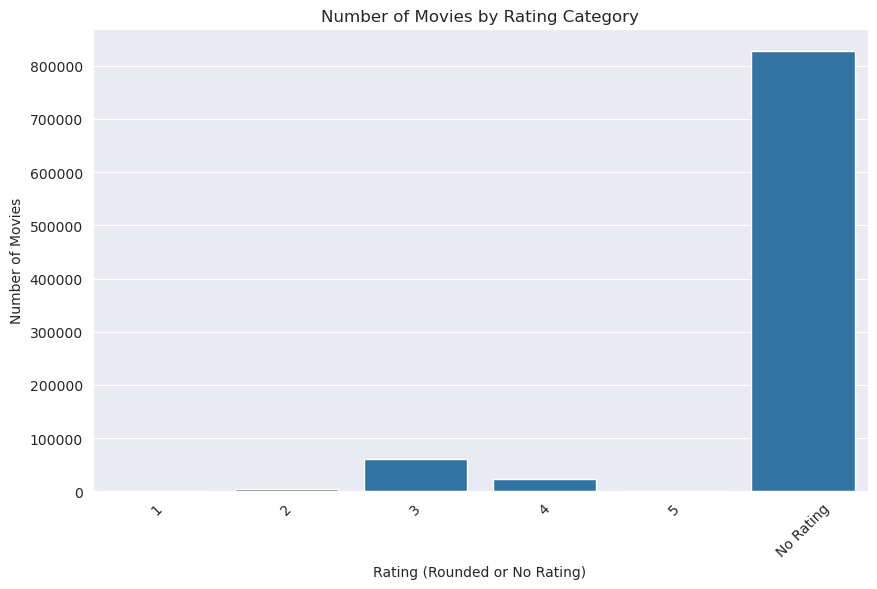

In [124]:
# Approssimare la colonna rating agli interi
df_movies_clean['rounded_rating'] = df_movies_clean['rating'].round().astype(int)

# Creare una nuova colonna per includere i film senza valutazione
df_movies_clean['rating_category'] = df_movies_clean['rounded_rating'].astype(str)
df_movies_clean.loc[df_movies_clean['rating'] == -1, 'rating_category'] = 'No Rating'

# Creare il countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='rating_category', data=df_movies_clean, order=sorted(df_movies_clean['rating_category'].unique()))

plt.title('Number of Movies by Rating Category')
plt.xlabel('Rating (Rounded or No Rating)')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

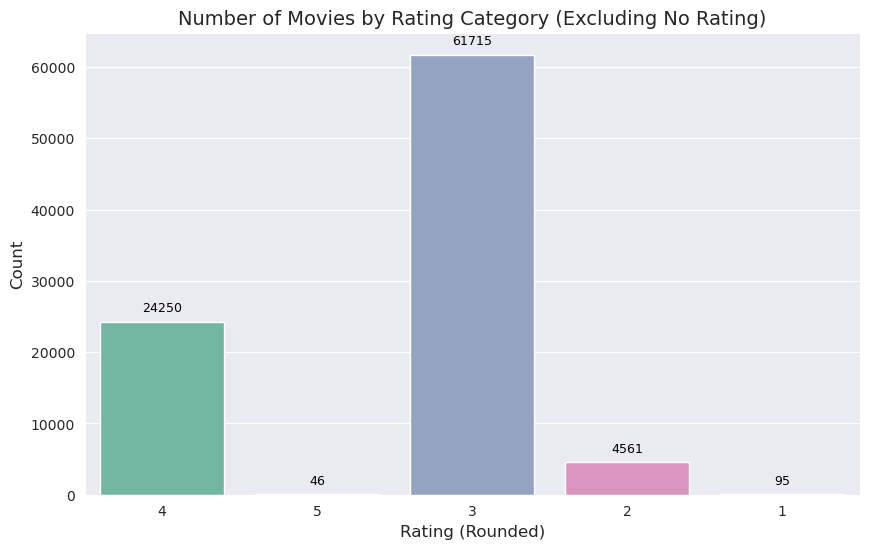

In [125]:
# Funzione per aggiungere i valori sopra le barre
def add_count_on_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black',
                    xytext=(0, 5), textcoords='offset points')

# Filtrare il DataFrame per escludere quelli con 'No Rating'
filtered_df = df_movies_clean[df_movies_clean['rating_category'] != 'No Rating']

# Creare il countplot con `hue`
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating_category', data=filtered_df, hue='rating_category',
                   palette='Set2', dodge=False)

# Disabilitare la legenda (non necessaria in questo caso)
plt.legend([], [], frameon=False)

# Aggiungere titolo e etichette
plt.title('Number of Movies by Rating Category (Excluding No Rating)', fontsize=14)
plt.xlabel('Rating (Rounded)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Aggiungere i valori sopra le barre
add_count_on_bars(ax)

# Mostrare il grafico
plt.show()

si potrebbe poi vedere quanti dei film senza valutazione devono ancora uscire e quanti no invece. Per il rating countplot potrebbe essere poco efficiente

## Numero di film usciti per decade

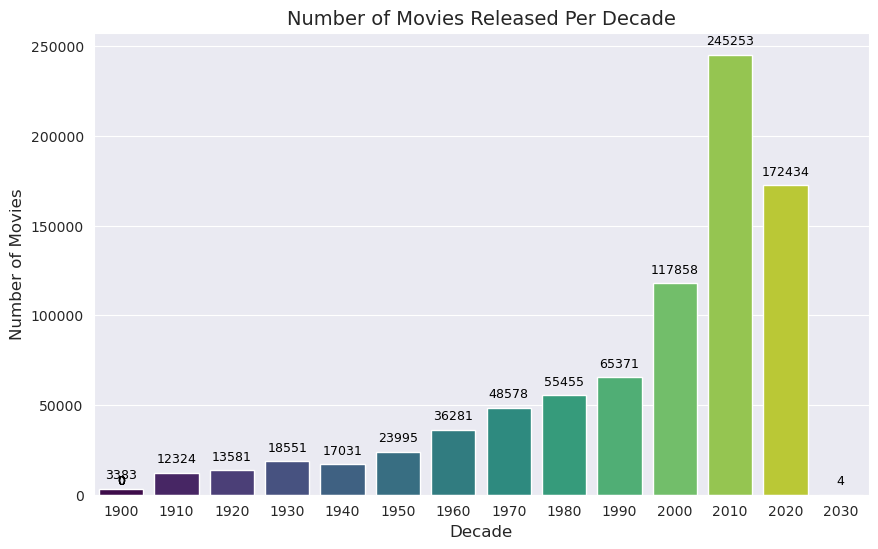

In [126]:
# Filtrare anni non validi o troppo vecchi
df_movies_clean = df_movies_clean[df_movies_clean['year'] >= 1900]

# Creare la colonna 'decade'
df_movies_clean['decade'] = (df_movies_clean['year'] // 10) * 10

# Creare il barplot con il DataFrame corretto
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='decade', data=df_movies_clean, hue='decade', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)

# Aggiungere titolo e etichette
plt.title('Number of Movies Released Per Decade', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Aggiungere conteggi sopra le barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## Film rilasciati negli Stati Uniti per decade

/tmp/ipykernel_10461/2622030862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['decade'] = (df_usa['year'] // 10) * 10


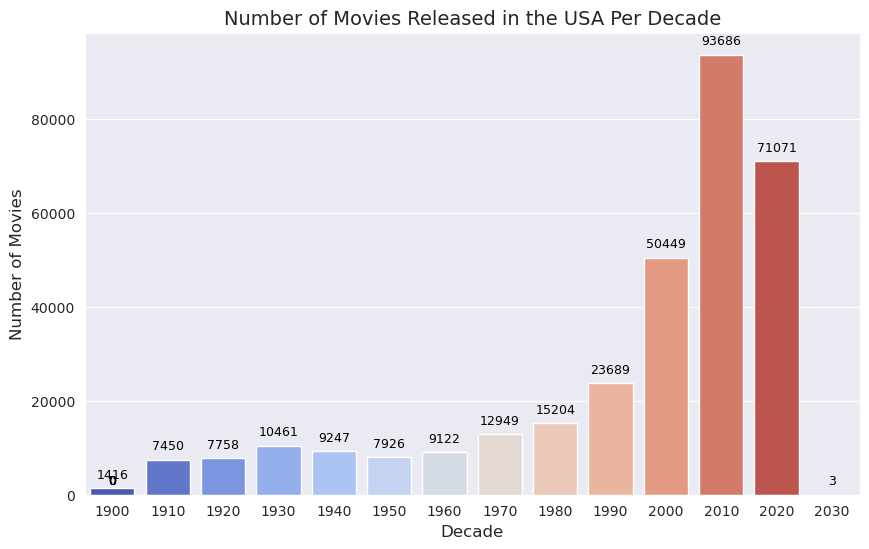

In [127]:
# Filtrare i film rilasciati negli Stati Uniti e calcolare la decade
df_releases_clean['year'] = pd.to_datetime(df_releases_clean['date'], errors='coerce').dt.year
df_usa = df_releases_clean[(df_releases_clean['country'] == 'USA') & (df_releases_clean['year'] >= 1900)]
df_usa['decade'] = (df_usa['year'] // 10) * 10

# Creare il barplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='decade', data=df_usa, hue='decade', palette='coolwarm', dodge=False)
plt.legend([], [], frameon=False)

# Aggiungere titolo e etichette
plt.title('Number of Movies Released in the USA Per Decade', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Aggiungere conteggi sopra le barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## Studios che hanno prodotto più film

/tmp/ipykernel_10461/610433979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='studio', y='movie_count', data=top_studios, palette='coolwarm')


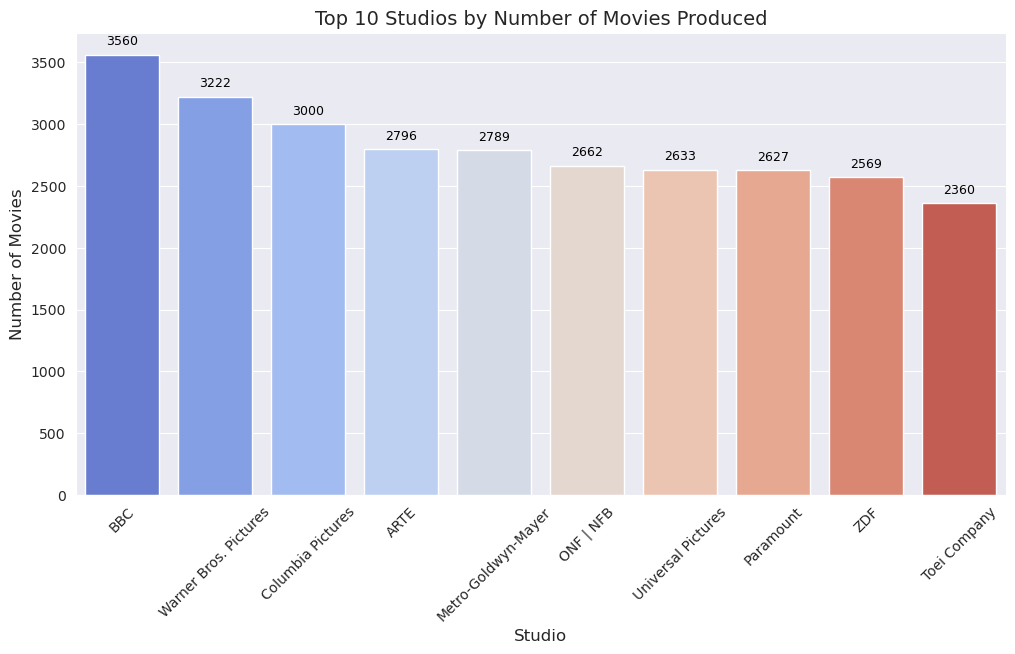

In [128]:
# Contare i film prodotti per ogni studio
studio_counts = df_studios_clean['studio'].value_counts().head(10)  # I primi 10 studi

# Creare un DataFrame temporaneo per il grafico
top_studios = studio_counts.reset_index()
top_studios.columns = ['studio', 'movie_count']

# Creare il barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='studio', y='movie_count', data=top_studios, palette='coolwarm')

# Aggiungere titolo e etichette
plt.title('Top 10 Studios by Number of Movies Produced', fontsize=14)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)

# Annotare i valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Possiamo chiederci come mai questi sono gli studios a produrre più film? Potrebbe essere magari una questione di longevità, la longevità potrebbe essere la chiave del loro successo. Per cui visualizziamo gli anni di inizio per ogni studi per verificarlo.

/tmp/ipykernel_10461/371032275.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=studio_start_years.index, y=studio_start_years.values, palette='viridis')


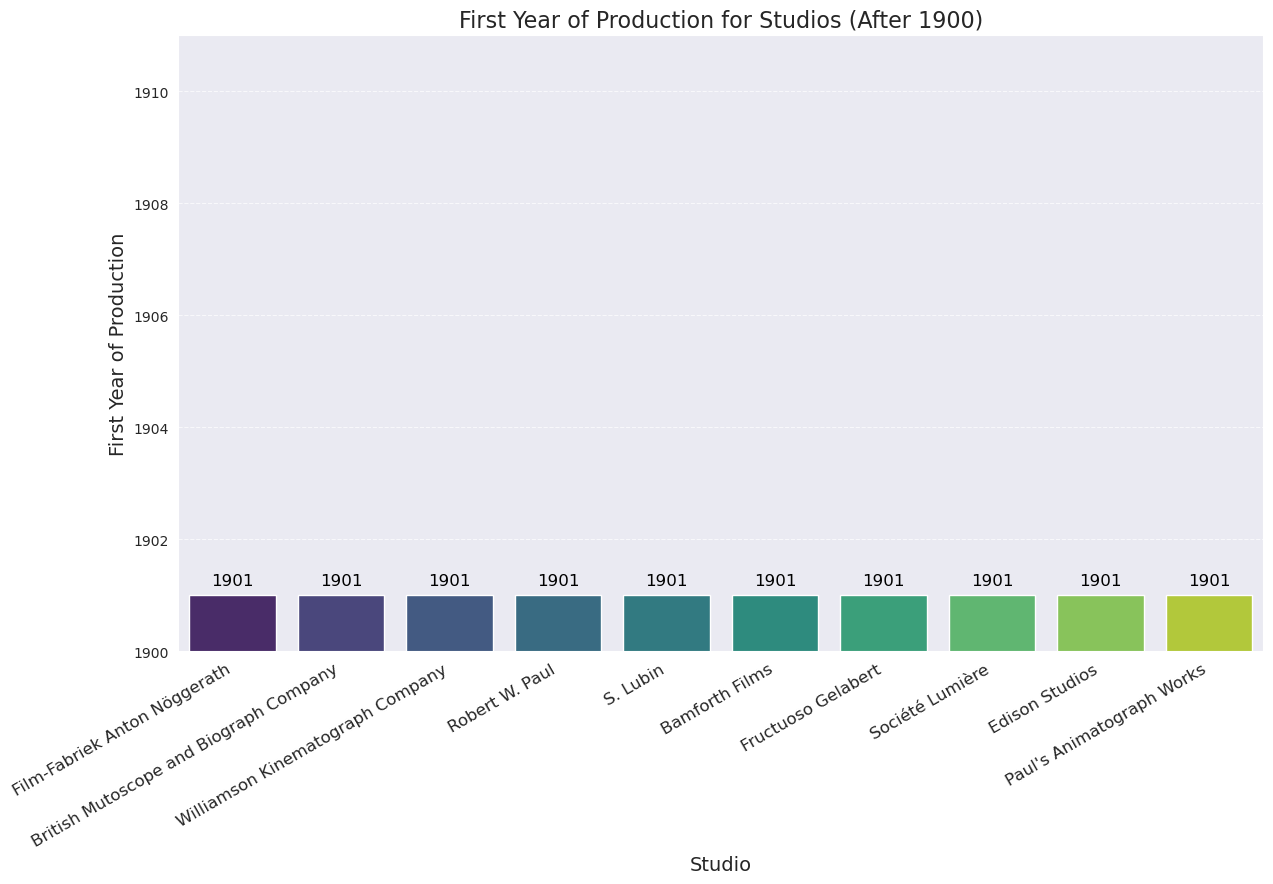

In [145]:
# Filtrare gli studios per escludere year = 0 e year <= 1900
studios_with_years = pd.merge(df_studios_clean, df_movies_clean[['id', 'year']], left_on='film_id', right_on='id')
studios_with_years = studios_with_years[(studios_with_years['year'] > 1900)]

# Calcolare l'anno di inizio per ogni studio
studio_start_years = studios_with_years.groupby('studio')['year'].min().sort_values().head(10)

# Visualizzare gli anni di inizio con i numeri sopra le barre
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=studio_start_years.index, y=studio_start_years.values, palette='viridis')

# Aggiungere i numeri sopra le barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurare titolo, etichette e asse y
plt.title('First Year of Production for Studios (After 1900)', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('First Year of Production', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.ylim(1900, studio_start_years.max() + 10)  # L'asse y parte dal 1900
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipykernel_10461/3511307589.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=studio_start_years_top.index, y=studio_start_years_top.values, palette='coolwarm')


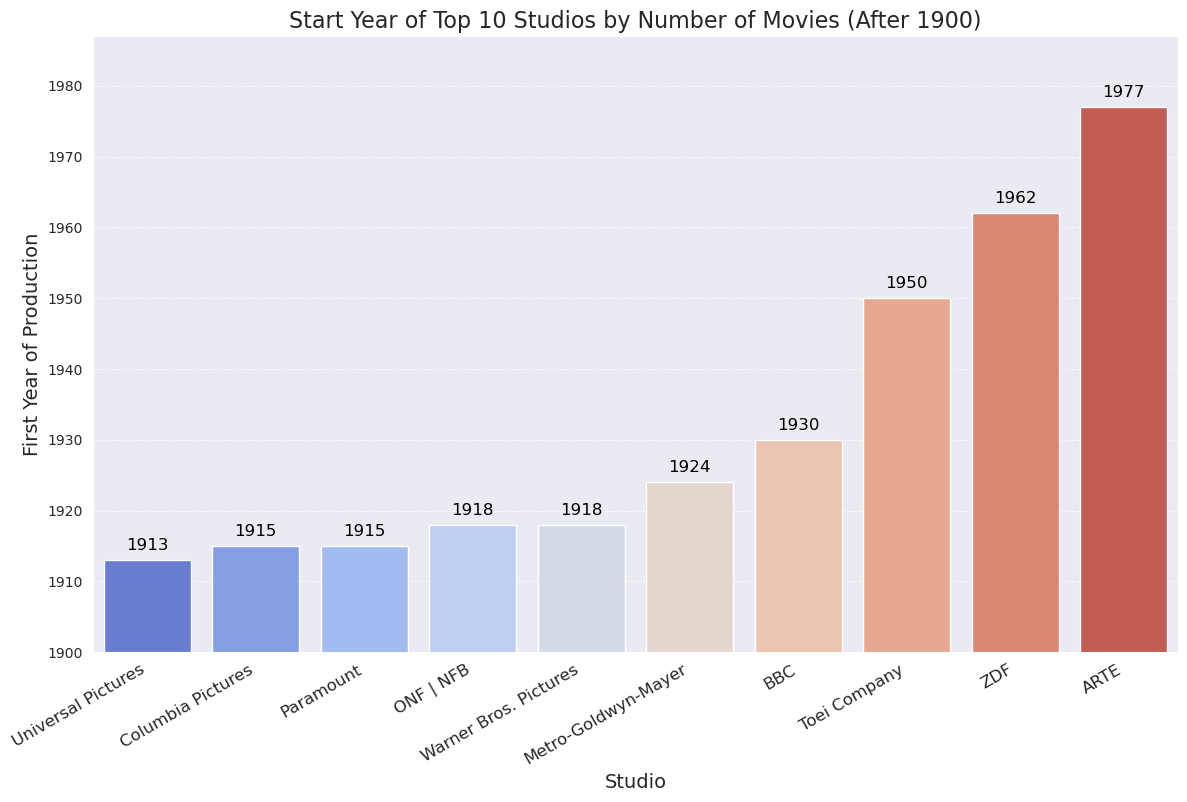

In [146]:
# Calcolare i primi 10 studios per numero di film prodotti (dopo il 1900)
top_studios = studios_with_years['studio'].value_counts().head(10)

# Filtrare per i primi 10 studios
filtered_studios = studios_with_years[studios_with_years['studio'].isin(top_studios.index)]

# Calcolare l'anno di inizio per i primi 10 studios
studio_start_years_top = filtered_studios.groupby('studio')['year'].min().sort_values()

# Visualizzare il confronto con numeri sopra le barre
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=studio_start_years_top.index, y=studio_start_years_top.values, palette='coolwarm')

# Aggiungere i numeri sopra le barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurare titolo, etichette e asse y
plt.title('Start Year of Top 10 Studios by Number of Movies (After 1900)', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('First Year of Production', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.ylim(1900, studio_start_years_top.max() + 10)  # L'asse y parte dal 1900
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Possiamo notare che i primi 3 per numero di film non sono necessariamente i più vecchi forse hanno solo adottato strategie diverse. Proviamo a vedere lungo gli anni quanti film hanno prodotto per ogni anno.

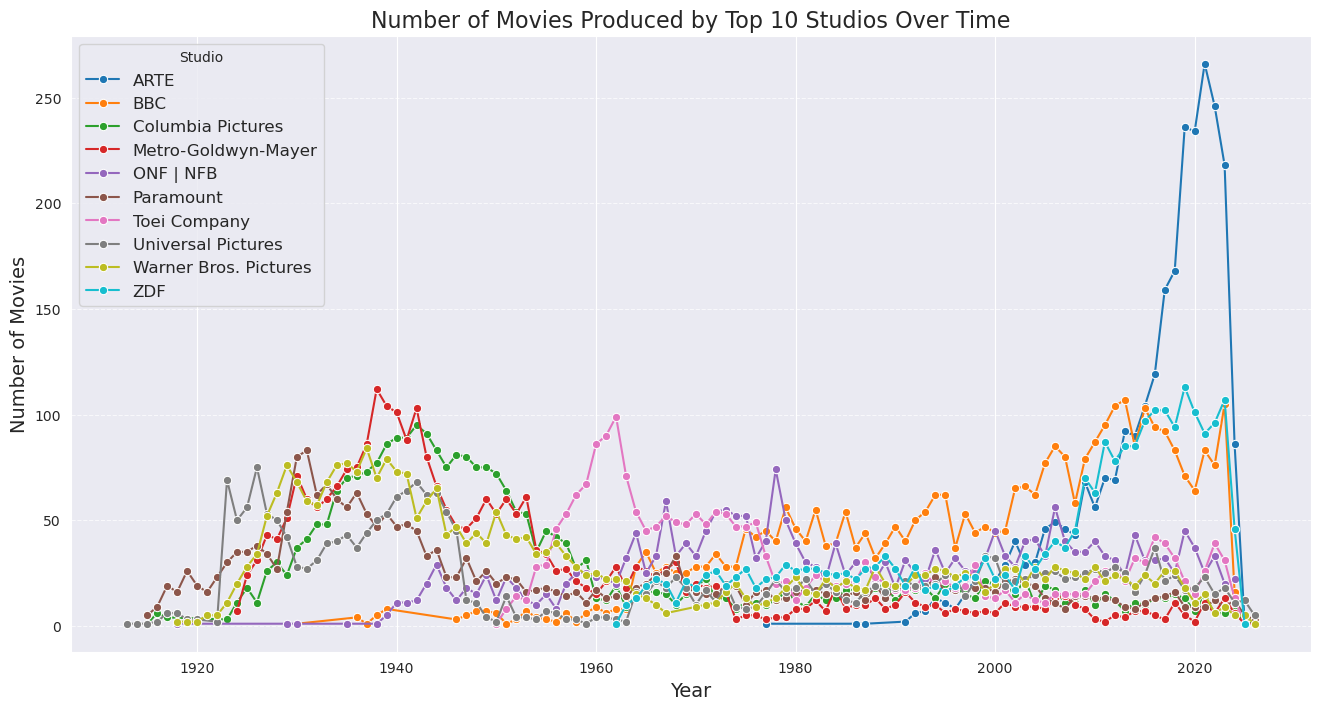

In [162]:
# Determinare i top 10 studios per numero di film prodotti (senza filtrare 'rating')
top_studios = studios_with_years['studio'].value_counts().head(10).index

# Filtrare i dati per i top studios
filtered_studios = studios_with_years[studios_with_years['studio'].isin(top_studios)]

# Calcolare il numero di film prodotti per studio e anno
studio_year_counts = filtered_studios.groupby(['studio', 'year']).size().reset_index(name='movie_count')

# Visualizzare il lineplot (quantità di film prodotti nel tempo)
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='movie_count', hue='studio', data=studio_year_counts, marker='o', palette='tab10')

plt.title('Number of Movies Produced by Top 10 Studios Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Studio', fontsize=12)
plt.show()

Si può notare che in alcuni casi la longevità è effettivamente un fattore che spiega il motivo per cui hanno prodotto più film, come ad esempio Paramount, che non ha dei particolari picchi negli anni. In altri casi come nel caso di ARTE che è meno vecchio ad altri studios ma ha avuto un notevole aumento nella produzione di film negli ultimi anni, cosa che l'ha portato ad essere al quarto posto tra gli studios che hanno prodotto più film.

### Ma quantità è sinonimo di qualità?

Andiamo a vedere quali sono gli studios con valutazioni più alte e se ci sono i nostri top_studios.

In [151]:
# Effettuare il merge includendo anche la colonna 'rating'
studios_with_years = pd.merge(
    df_studios_clean,
    df_movies_clean[['id', 'rating', 'year']],  # Assicurati di includere 'rating'
    left_on='film_id',
    right_on='id'
)


/tmp/ipykernel_10461/1342391517.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=studio_avg_rating.index, y=studio_avg_rating.values, palette='coolwarm')


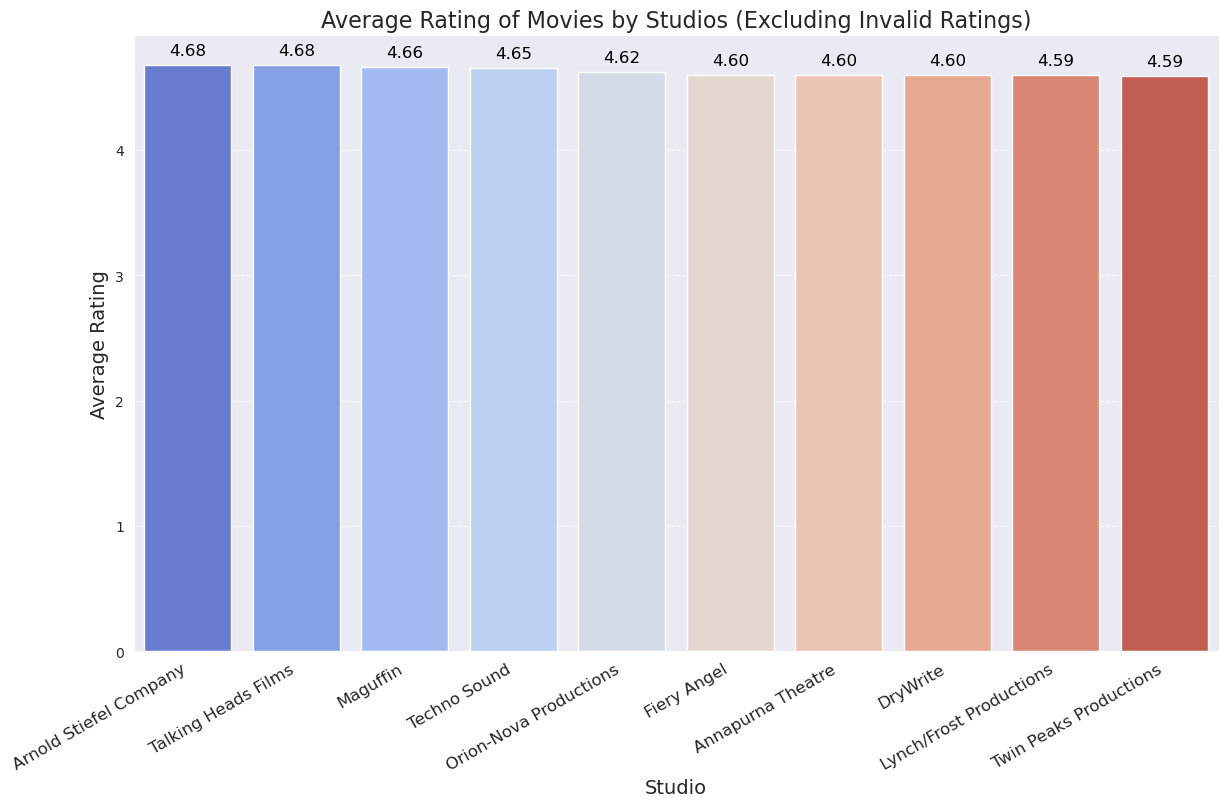

In [152]:
# Filtrare i dati per escludere valutazioni pari a -1
studios_with_valid_ratings = studios_with_years[studios_with_years['rating'] != -1]

# Calcolare la valutazione media per studio
studio_avg_rating = studios_with_valid_ratings.groupby('studio')['rating'].mean().sort_values(ascending=False).head(10)

# Visualizzare il barplot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=studio_avg_rating.index, y=studio_avg_rating.values, palette='coolwarm')

# Annotare i valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurare titolo, etichette e griglia
plt.title('Average Rating of Movies by Studios (Excluding Invalid Ratings)', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Vediamo che top_studios non sono tra gli studios con la valutazione più alta

/tmp/ipykernel_10461/1088704143.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=studio_avg_rating.index, y=studio_avg_rating.values, palette='viridis')


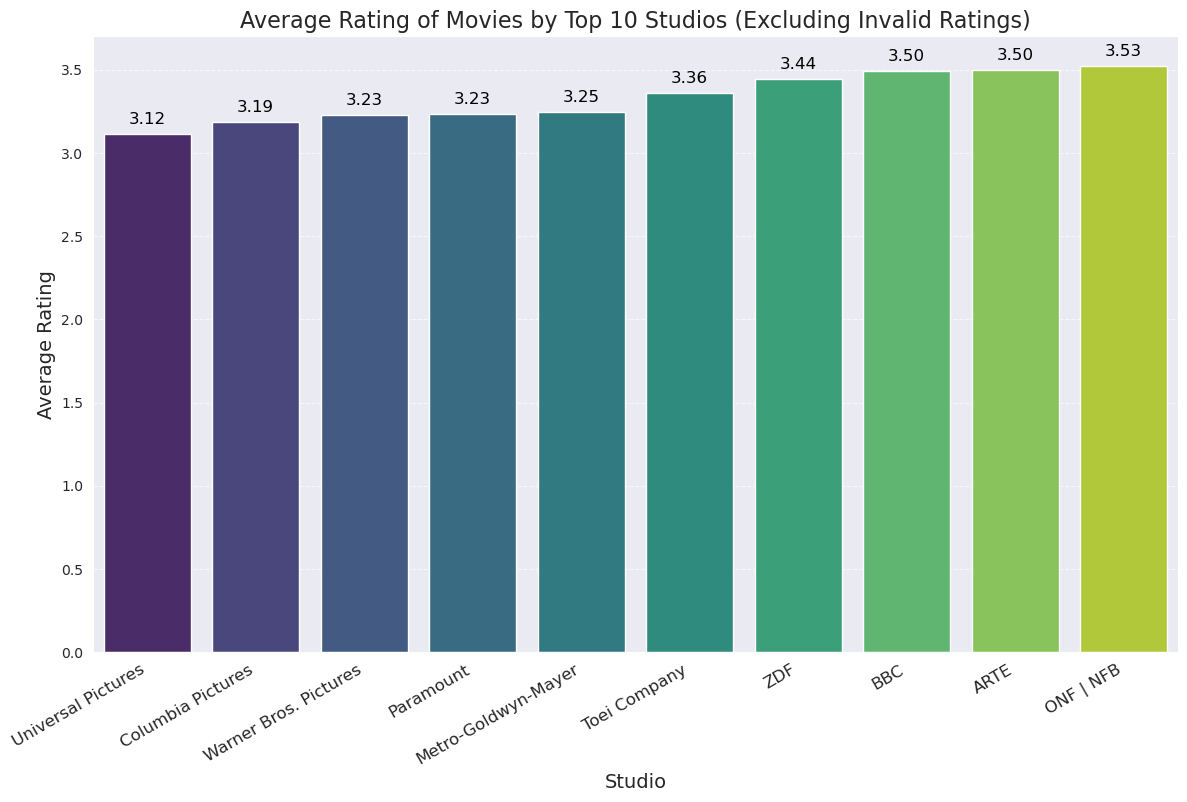

In [161]:
# Filtrare i dati validi (escludendo rating = -1) per i top studios
filtered_valid_studios = studios_with_valid_ratings[studios_with_valid_ratings['studio'].isin(top_studios)]

# Calcolare la valutazione media per i top studios
studio_avg_rating = filtered_valid_studios.groupby('studio')['rating'].mean().sort_values()

# Visualizzare il barplot (valutazione media)
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=studio_avg_rating.index, y=studio_avg_rating.values, palette='viridis')

# Annotare i valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Rating of Movies by Top 10 Studios (Excluding Invalid Ratings)', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_10461/3346409289.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='studio', y='rating', data=filtered_valid_studios, palette='viridis', scale='width')
/tmp/ipykernel_10461/3346409289.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='studio', y='rating', data=filtered_valid_studios, palette='viridis', scale='width')


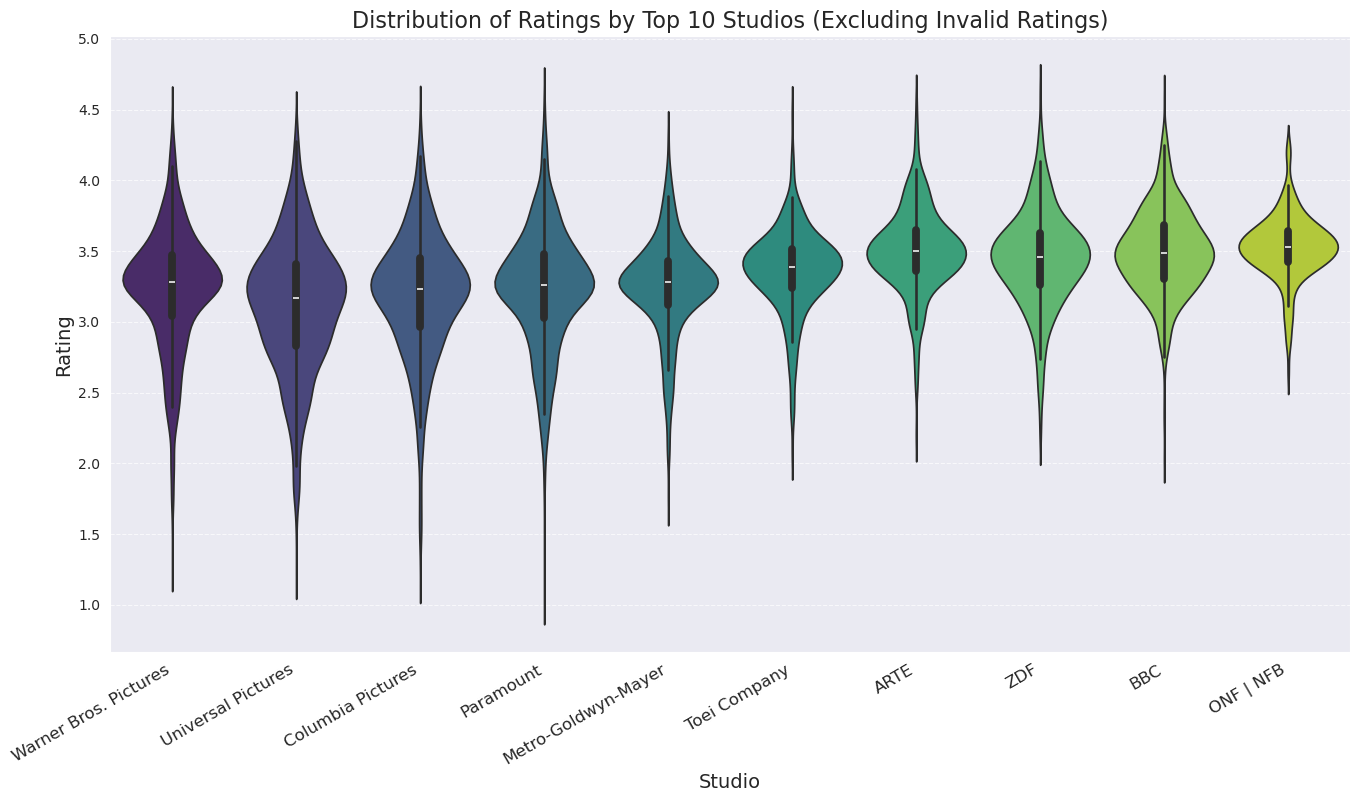

In [164]:
# Filtrare i dati validi (rating != -1) per i top studios
filtered_valid_studios = studios_with_valid_ratings[studios_with_valid_ratings['studio'].isin(top_studios)]

# Creare il violinplot
plt.figure(figsize=(16, 8))
sns.violinplot(x='studio', y='rating', data=filtered_valid_studios, palette='viridis', scale='width')

# Configurare titolo, etichette e griglia
plt.title('Distribution of Ratings by Top 10 Studios (Excluding Invalid Ratings)', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
